100%|██████████| 100000/100000 [00:04<00:00, 22799.76it/s]


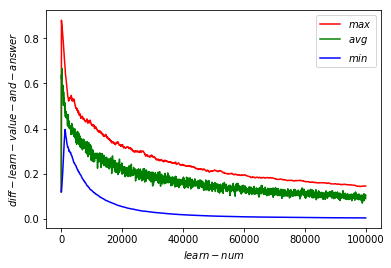

In [1]:
% matplotlib inline

from matplotlib import pyplot as plt
from tqdm import tqdm
import numpy as np

class Neuron():
    """Learning 'logical and'
    """
    def __init__(self, input_num):
        """init
        param: input_num (integer): input number
        """
        # Learning rate
        self._rate = 0.01
        # weight to input values default
        self._weight = np.array(np.round(np.random.rand(input_num)))
        # bias value
        self._bias = 1.0
        # output values
        self._output = None

    def learn(self, inputs):
        """Learning
        param: inputs (ndarray): input values
        return (float): Difference between output value and correct answer value after learning
        """

        """forward　process
        """
        # calculate the state by input values(inputs) and weight(_weight) and(_bias)
        state = self._weight.dot(inputs) + self._bias
        # calculate output value
        self._output = self._activation_func(state)

        """backward　process(feedback)
        """
        # get answer value by input values
        answer = self._get_answer(inputs)
        #　common coefficient for update parameters
        # derivative value of cost function
        d_cost_func = self._output - answer
        # derivative value of activate function
        d_activate_func = self._output * (1 - self._output)
        # common coefficient
        common_coefficient = d_cost_func * d_activate_func
        # update weight
        self._weight -= self._rate * common_coefficient * inputs
        # update bias
        self._bias -= self._rate * common_coefficient

        # Difference between output value and correct answer value after learning
        return np.abs(self._output - answer)

    def _activation_func(self, state):
        """
        """
        # calculate the output value by the state of neuron(0~1)
        # logistic sigmoid
        return 1 / (1 + np.exp(-state))

    def _get_answer(self, inputs):
        """Get input value of correct answer derived from input value
        param: inputs (ndarray): input values
        return (integer): 0 or 1
        """
        return 0 if (inputs[inputs == 0.0].size) else 1

if __name__ == '__main__':
    # input num
    input_num = 2
    # learn loop num
    learn_num = 100000
    # result output interval
    interval = 50

    # learning
    n = Neuron(input_num)
    output_x = []
    tmp_y = []
    output_y_max = []
    output_y_avg = []
    output_y_min = []
    for i in tqdm(range(0, learn_num)):
        # input from random　combination　(0,0 or 0,1 or 1,0 or 1,1)
        x = np.array(np.round(np.random.rand(input_num)))
        diff = n.learn(x)
        tmp_y.append(diff)
        if i % interval == 0:
            # Average, max, min value for each set number of loops
            output_y_max.append(max(tmp_y))
            output_y_avg.append(sum(tmp_y) / len(tmp_y))
            output_y_min.append(min(tmp_y))
            tmp_y = []
            output_x.append(i+1)

    # output
    line_max, line_avg, line_min = plt.plot(
        output_x, output_y_max, 'r-', 
        output_x, output_y_avg, 'g-', 
        output_x, output_y_min, 'b-'
    )
    plt.legend((line_max, line_avg, line_min), ('$max$', '$avg$', '$min$'))
    plt.xlabel('$learn-num$')
    plt.ylabel('$diff-learn-value-and-answer$')
    plt.show()